# Preparing Numeric Data

There are variety of preprocessing tasks one should consider before using numeric data in analysis and predictive models.

### Install necessary libraries

In [1]:
#!pip install numpy
#!pip install pandas
#!pip install ggplot
#!pip install sklearn

### Import necessary libraries

In [2]:
#import useful modules
import numpy as np              
import pandas as pd
from sklearn.preprocessing import StandardScaler

# This line lets me show plots
%matplotlib inline       

## Import data

We will use the mtcars dataset from the ggplot library. 

In [3]:
# read data into a DataFrame
mtcars = pd.read_csv('mtcars.csv')
mtcars.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [4]:
mtcars.describe()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


## Centering and Scaling
Numeric variables are not always directly comparable as variables are often measured on different scales and cover different ranges. Furthermore, large differences between values, one variable has values in the range 1-100 while other variable ranges from 1 to 100000, can affect certain modeling techniques (e.g., where the values of the two variables need to be combined in some way).

Some of the issues mentioned above can be alleviated by centering and scaling the data. A common way to center data is to subtract the mean value from each data point, which centers the data around zero (and sets the new mean to zero). 


In [5]:
mtcars.index = mtcars.model       # Set row index to car model
del mtcars["model"]               # Drop car model column

In [6]:
colmeans = mtcars.mean()
colmeans

mpg      20.090625
cyl       6.187500
disp    230.721875
hp      146.687500
drat      3.596563
wt        3.217250
qsec     17.848750
vs        0.437500
am        0.406250
gear      3.687500
carb      2.812500
dtype: float64

Now, subtract the column means from each row, element-wise, to zero center the data:

In [7]:
centered_mtcars = mtcars - colmeans
centered_mtcars.describe()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,3.200000e+01,32.000000,3.200000e+01,32.000000,3.200000e+01,3.200000e+01,3.200000e+01,32.000000,32.000000,32.000000,32.0000
mean,-3.108624e-15,0.000000,2.131628e-14,0.000000,-1.526557e-16,-4.440892e-16,-2.609024e-15,0.000000,0.000000,0.000000,0.0000
std,6.026948e+00,1.785922,1.239387e+02,68.562868,5.346787e-01,9.784574e-01,1.786943e+00,0.504016,0.498991,0.737804,1.6152
min,-9.690625e+00,-2.187500,-1.596219e+02,-94.687500,-8.365625e-01,-1.704250e+00,-3.348750e+00,-0.437500,-0.406250,-0.687500,-1.8125
25%,-4.665625e+00,-2.187500,-1.098969e+02,-50.187500,-5.165625e-01,-6.360000e-01,-9.562500e-01,-0.437500,-0.406250,-0.687500,-0.8125
50%,-8.906250e-01,-0.187500,-3.442187e+01,-23.687500,9.843750e-02,1.077500e-01,-1.387500e-01,-0.437500,-0.406250,0.312500,-0.8125
75%,2.709375e+00,1.812500,9.527813e+01,33.312500,3.234375e-01,3.927500e-01,1.051250e+00,0.562500,0.593750,0.312500,1.1875
max,1.380937e+01,1.812500,2.412781e+02,188.312500,1.333437e+00,2.206750e+00,5.051250e+00,0.562500,0.593750,1.312500,5.1875


Notice that in zero-centered data, negative values represent original values that were below average and positive numbers represent values that were above average.

To put all values on a common scale, we can divide all values in a column by that column's standard deviation. 

In [8]:
# Get column standard deviations
column_deviations = centered_mtcars.std(axis=0)   

centered_and_scaled_mtcars = centered_mtcars/column_deviations 
centered_and_scaled_mtcars.describe()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,3.200000e+01,3.200000e+01,3.200000e+01,3.200000e+01,3.200000e+01,3.200000e+01,3.200000e+01,32.000000,3.200000e+01,3.200000e+01,3.200000e+01
mean,-5.551115e-16,-2.775558e-17,1.110223e-16,2.775558e-17,-2.775558e-16,-3.608225e-16,-1.471046e-15,0.000000,5.551115e-17,-2.775558e-17,2.775558e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.607883e+00,-1.224858e+00,-1.287910e+00,-1.381032e+00,-1.564608e+00,-1.741772e+00,-1.874010e+00,-0.868028,-8.141431e-01,-9.318192e-01,-1.122152e+00
25%,-7.741273e-01,-1.224858e+00,-8.867035e-01,-7.319924e-01,-9.661175e-01,-6.500027e-01,-5.351317e-01,-0.868028,-8.141431e-01,-9.318192e-01,-5.030337e-01
50%,-1.477738e-01,-1.049878e-01,-2.777331e-01,-3.454858e-01,1.841059e-01,1.101223e-01,-7.764656e-02,-0.868028,-8.141431e-01,4.235542e-01,-5.030337e-01
75%,4.495434e-01,1.014882e+00,7.687521e-01,4.858679e-01,6.049193e-01,4.013971e-01,5.882951e-01,1.116036,1.189901e+00,4.235542e-01,7.352031e-01
max,2.291272e+00,1.014882e+00,1.946754e+00,2.746567e+00,2.493904e+00,2.255336e+00,2.826755e+00,1.116036,1.189901e+00,1.778928e+00,3.211677e+00


All columns/variables/features now have a standard deviation of 1, and roughly the same mean, 0. 

## Using sklearn's scale
This can also be achieved using the scale() function in the module scikit-learn scale() returns an ndarray which can be convert into a DataFrame, if needed.

In [9]:
from sklearn import preprocessing

scaled_data = preprocessing.scale(mtcars)

#reconstruct a DataFrame from the scaled data
scaled_mtcars = pd.DataFrame(scaled_data,    
                           index=mtcars.index,
                           columns=mtcars.columns)

scaled_mtcars.describe()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,3.200000e+01,3.200000e+01,3.200000e+01,32.000000,3.200000e+01,3.200000e+01,3.200000e+01,32.000000,32.000000,3.200000e+01,3.200000e+01
mean,-4.996004e-16,2.775558e-17,1.665335e-16,0.000000,-3.053113e-16,-4.718448e-16,-1.471046e-15,0.000000,0.000000,-2.775558e-17,-2.775558e-17
std,1.016001e+00,1.016001e+00,1.016001e+00,1.016001,1.016001e+00,1.016001e+00,1.016001e+00,1.016001,1.016001,1.016001e+00,1.016001e+00
min,-1.633610e+00,-1.244457e+00,-1.308518e+00,-1.403130,-1.589643e+00,-1.769642e+00,-1.903996e+00,-0.881917,-0.827170,-9.467293e-01,-1.140108e+00
25%,-7.865141e-01,-1.244457e+00,-9.008917e-01,-0.743705,-9.815764e-01,-6.604034e-01,-5.436944e-01,-0.881917,-0.827170,-9.467293e-01,-5.110827e-01
50%,-1.501383e-01,-1.066677e-01,-2.821771e-01,-0.351014,1.870518e-01,1.118844e-01,-7.888899e-02,-0.881917,-0.827170,4.303315e-01,-5.110827e-01
75%,4.567366e-01,1.031121e+00,7.810529e-01,0.493642,6.145986e-01,4.078199e-01,5.977084e-01,1.133893,1.208941,4.303315e-01,7.469671e-01
max,2.327934e+00,1.031121e+00,1.977904e+00,2.790515,2.533809e+00,2.291423e+00,2.871986e+00,1.133893,1.208941,1.807392e+00,3.263067e+00


Note that the values are not exactly the same as those calculated "manually", likely due to scikit-learn's implementation of centering and scaling.

## Using sklearn's StandardScaler object

We can use this library to fit a scaler to a dataset and use it to transform another dataset using the same scaling method. In this case, we just reapply the scaler to the same dataset.

In [10]:
scaler = StandardScaler()
scaler.fit(mtcars)
new_mt = mtcars
scaler.fit_transform(new_mt)

#reconstruct a DataFrame from the scaled data
scaled_mtcars = pd.DataFrame(scaled_data,    
                           index=mtcars.index,
                           columns=mtcars.columns)

scaled_mtcars.describe()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,3.200000e+01,3.200000e+01,3.200000e+01,32.000000,3.200000e+01,3.200000e+01,3.200000e+01,32.000000,32.000000,3.200000e+01,3.200000e+01
mean,-4.996004e-16,2.775558e-17,1.665335e-16,0.000000,-3.053113e-16,-4.718448e-16,-1.471046e-15,0.000000,0.000000,-2.775558e-17,-2.775558e-17
std,1.016001e+00,1.016001e+00,1.016001e+00,1.016001,1.016001e+00,1.016001e+00,1.016001e+00,1.016001,1.016001,1.016001e+00,1.016001e+00
min,-1.633610e+00,-1.244457e+00,-1.308518e+00,-1.403130,-1.589643e+00,-1.769642e+00,-1.903996e+00,-0.881917,-0.827170,-9.467293e-01,-1.140108e+00
25%,-7.865141e-01,-1.244457e+00,-9.008917e-01,-0.743705,-9.815764e-01,-6.604034e-01,-5.436944e-01,-0.881917,-0.827170,-9.467293e-01,-5.110827e-01
50%,-1.501383e-01,-1.066677e-01,-2.821771e-01,-0.351014,1.870518e-01,1.118844e-01,-7.888899e-02,-0.881917,-0.827170,4.303315e-01,-5.110827e-01
75%,4.567366e-01,1.031121e+00,7.810529e-01,0.493642,6.145986e-01,4.078199e-01,5.977084e-01,1.133893,1.208941,4.303315e-01,7.469671e-01
max,2.327934e+00,1.031121e+00,1.977904e+00,2.790515,2.533809e+00,2.291423e+00,2.871986e+00,1.133893,1.208941,1.807392e+00,3.263067e+00


## Dealing with Skewed Data

The distribution of the data can have a significant impact on analysis and modeling, as many techniques assume, or require that the data follows a particular distribution, e.g., Gaussian. Some data sets exhibit significant asymmetry (skewness). To illustrate, let's generate a few distributions. Let us look at a few examples.


array([[<Axes: title={'center': '0'}>]], dtype=object)

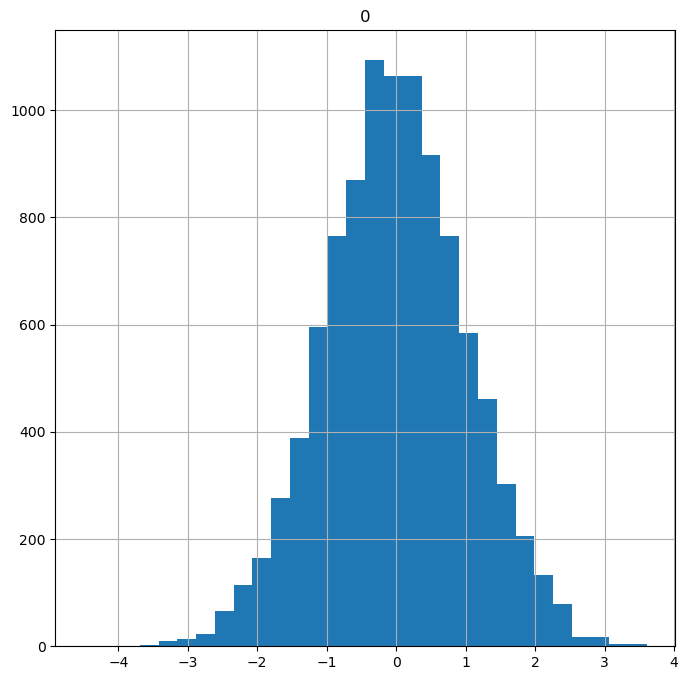

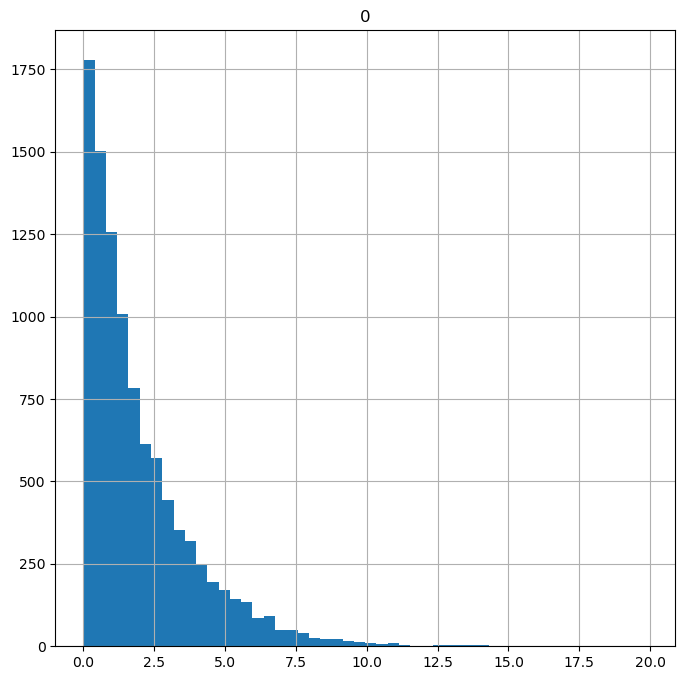

In [11]:
normally_distributed = np.random.normal(size=10000)  # Generate normal data*

normally_distributed = pd.DataFrame(normally_distributed) # Convert to DF

normally_distributed.hist(figsize=(8,8),                  # Plot histogram
                          bins=30)       

skewed = np.random.exponential(scale=2,      # Generate skewed data
                               size= 10000)  

skewed = pd.DataFrame(skewed)                # Convert to DF

skewed.hist(figsize=(8,8),                   # Plot histogram
            bins=50)          

Data with a long right tail is called positively skewed or right skewed. In a skewed dataset, the extreme values in the long tail can have a very large influence on some of the test and models performed or build for the data.

Reducing skew may be in some cases appropriate. Two simple transformations that can reduce skew are taking the square root of each data point or taking the natural logarithm of each data point. 

array([[<Axes: title={'center': '0'}>]], dtype=object)

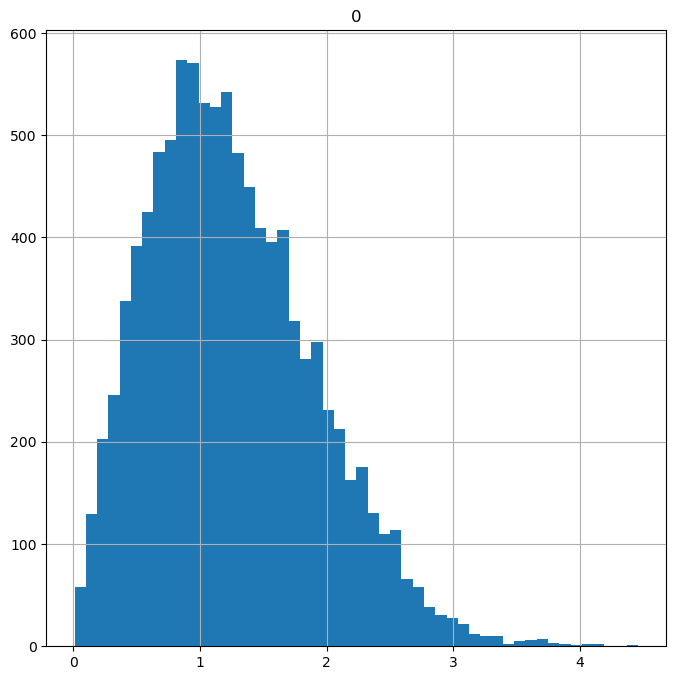

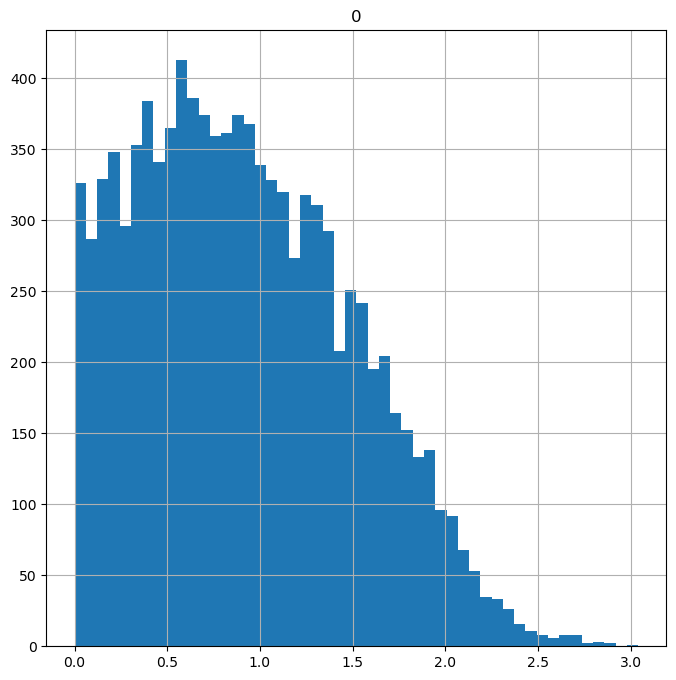

In [12]:
sqrt_transformed = skewed.apply(np.sqrt) # Get the square root of data points*

sqrt_transformed.hist(figsize=(8,8),     # Plot histogram
                 bins=50)  
log_transformed = (skewed+1).apply(np.log)   # Get the log of the data

log_transformed.hist(figsize = (8,8),          # Plot histogram
                 bins=50)    


## Highly Correlated Variables

In predictive modeling, each variable used to construct a model would ideally represent some unique feature of the data. In reality, variables often exhibit collinearity, and variables with strong correlations can interfere with the modeling process. We can check the pairwise correlations between numeric variables using the `df.corr()` function:


In [13]:
mtcars.iloc[:,0:6].corr()   # Check the pairwise correlations of 6 variables

,mpg,cyl,disp,hp,drat,wt
mpg,1.000000,-0.852162,-0.847551,-0.776168,0.681172,-0.867659
cyl,-0.852162,1.000000,0.902033,0.832447,-0.699938,0.782496
disp,-0.847551,0.902033,1.000000,0.790949,-0.710214,0.887980
hp,-0.776168,0.832447,0.790949,1.000000,-0.448759,0.658748
drat,0.681172,-0.699938,-0.710214,-0.448759,1.000000,-0.712441
wt,-0.867659,0.782496,0.887980,0.658748,-0.712441,1.000000


A positive correlation implies that when one variable goes up the other tends to go up as well, while negative correlations indicate an inverse relationship.  

In the mtcar dataset, the number of cylinders a car has (cyl) and its weight (wt) have fairly strong negative correlations to gas mileage (mpg.), i.e., heavier cars and cars with more cylinders tend to get lower gas mileage.
A scatter plot matrix can help  visualize this.  pandas' `scatter_matrix()` function accomplishes this:


array([[<Axes: xlabel='mpg', ylabel='mpg'>,
        <Axes: xlabel='cyl', ylabel='mpg'>,
        <Axes: xlabel='disp', ylabel='mpg'>,
        <Axes: xlabel='hp', ylabel='mpg'>,
        <Axes: xlabel='drat', ylabel='mpg'>,
        <Axes: xlabel='wt', ylabel='mpg'>],
       [<Axes: xlabel='mpg', ylabel='cyl'>,
        <Axes: xlabel='cyl', ylabel='cyl'>,
        <Axes: xlabel='disp', ylabel='cyl'>,
        <Axes: xlabel='hp', ylabel='cyl'>,
        <Axes: xlabel='drat', ylabel='cyl'>,
        <Axes: xlabel='wt', ylabel='cyl'>],
       [<Axes: xlabel='mpg', ylabel='disp'>,
        <Axes: xlabel='cyl', ylabel='disp'>,
        <Axes: xlabel='disp', ylabel='disp'>,
        <Axes: xlabel='hp', ylabel='disp'>,
        <Axes: xlabel='drat', ylabel='disp'>,
        <Axes: xlabel='wt', ylabel='disp'>],
       [<Axes: xlabel='mpg', ylabel='hp'>,
        <Axes: xlabel='cyl', ylabel='hp'>,
        <Axes: xlabel='disp', ylabel='hp'>,
        <Axes: xlabel='hp', ylabel='hp'>,
        <Axes: xlabel='drat

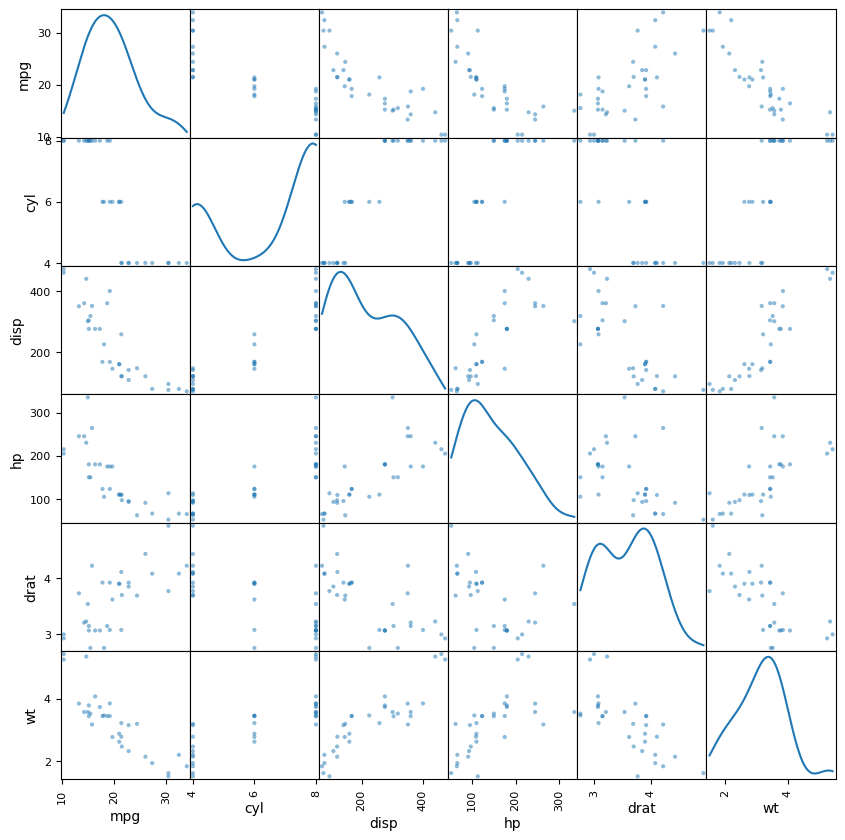

In [14]:
from pandas.plotting import scatter_matrix

scatter_matrix(mtcars.iloc[:,0:6],   # Make a scatter matrix of 6 columns
               figsize=(10, 10),   # Set plot size
               diagonal='kde')    # Show distribution estimates on diagonal

A scatter plot matrix creates pairwise scatter plots that let you visually inspect the relationships between pairs of variables. It can also help identify oddities in the data, such as variables like cyl that only take on values in a small discrete set.
If you find highly correlated variables, there are a few things you can do including:

* Leave them be
* Remove one or more variables
* Combine them in some way

Reducing the number of variables under consideration, either by removing some or by combining them some way is known as "dimensionality reduction." How you choose to handle correlated variables is ultimately a subjective decision that should be informed by your goal.